In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
#import seaborn as sb
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

<h1> Load the training data </h1>

In [2]:
df = pd.read_csv('Train.csv')
dt = pd.read_csv('Test.csv')
df.head()
#dt.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


<h1> EXPLORATORY ANALYSIS </h1>

In [44]:
# Descriptive statistics
df.describe()
#df.info

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,label
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060,0.465417
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503,0.498805
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000,1.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000


We are now storing the labels of our columns in the variable "column_names"

In [60]:
#for col in df.columns:
    #print(col)

In [63]:
column_name=df.columns
print (column_name)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack',
       'last_flag', 'label'],
      dtype='object')


<h1>Check the data consistency</h1>

We check the number of duplicates using the pandas <em>duplicated()</em> method. The assertion checks if the number of non-duplicates (unique) rows is equal to the total number of rows in the dataset

In [4]:
number_of_duplicates = df.duplicated().value_counts()
print(number_of_duplicates)
print(df.shape)
print(number_of_duplicates[0] == df.shape[0])
assert number_of_duplicates[0] == df.shape[0], 'There are duplicates in the dataset'


False    125973
dtype: int64
(125973, 43)
True


We check if the names of the collumns are all unique

In [5]:

unique, counts = np.unique(df.columns.duplicated(), return_counts=True)
print(unique, counts)
print(df.shape)
assert counts[0] == df.shape[1], 'There are duplicate columns in the dataset'

[False] [43]
(125973, 43)


In case of detected duplicates in our dataset, we delete them and return the dataset with the duplicates row removed

In [64]:
# drop_duplicates () : this function return DataFrame with duplicate rows removed.
df = df.drop_duplicates(subset = column_name[:-1] , keep ='first' , inplace = False)
df.shape

(125973, 43)

We are checking for null values in the dataset.

In [65]:
null_rows = df[df.isnull().any(1)]
print(null_rows)

Empty DataFrame
Columns: [duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, is_host_login, is_guest_login, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate, attack, last_flag, label]
Index: []

[0 rows x 43 columns]


We extract the categorical column names from the dataframe. Next we will replace their string values by their one-hot encoding 

In [6]:
categorical_columns = [df.columns[i] for i in range(len(df.columns)) if type(df[df.columns[i]][0]) == str]
print(categorical_columns)

# Remove categorical columns from the rest 
continuous_columns = df.columns.tolist()
for category in categorical_columns:
    continuous_columns.remove(category)


print(continuous_columns)


['protocol_type', 'service', 'flag', 'attack']
['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag']


Then we encode the categorical columns using one-hot encoding. This encoding transforms the number of our categorical columns from 4 to 107. This relation is the sum of all of the possible categories over all categorical columns.

In [7]:
ohe = OneHotEncoder(handle_unknown='error')

features_encoded = ohe.fit_transform(df[categorical_columns]).toarray()
features_labels = np.concatenate(np.array(ohe.categories_, dtype=object))

# Add an unique suffix to the ohe labels incase they conflict with df feature labels
features_labels = [label + '_ohe' for label in features_labels]
print(features_encoded.shape)
print(features_labels)

df_encoded = pd.DataFrame(features_encoded, columns=features_labels)
df_encoded.head()

(125973, 107)
['icmp_ohe', 'tcp_ohe', 'udp_ohe', 'IRC_ohe', 'X11_ohe', 'Z39_50_ohe', 'aol_ohe', 'auth_ohe', 'bgp_ohe', 'courier_ohe', 'csnet_ns_ohe', 'ctf_ohe', 'daytime_ohe', 'discard_ohe', 'domain_ohe', 'domain_u_ohe', 'echo_ohe', 'eco_i_ohe', 'ecr_i_ohe', 'efs_ohe', 'exec_ohe', 'finger_ohe', 'ftp_ohe', 'ftp_data_ohe', 'gopher_ohe', 'harvest_ohe', 'hostnames_ohe', 'http_ohe', 'http_2784_ohe', 'http_443_ohe', 'http_8001_ohe', 'imap4_ohe', 'iso_tsap_ohe', 'klogin_ohe', 'kshell_ohe', 'ldap_ohe', 'link_ohe', 'login_ohe', 'mtp_ohe', 'name_ohe', 'netbios_dgm_ohe', 'netbios_ns_ohe', 'netbios_ssn_ohe', 'netstat_ohe', 'nnsp_ohe', 'nntp_ohe', 'ntp_u_ohe', 'other_ohe', 'pm_dump_ohe', 'pop_2_ohe', 'pop_3_ohe', 'printer_ohe', 'private_ohe', 'red_i_ohe', 'remote_job_ohe', 'rje_ohe', 'shell_ohe', 'smtp_ohe', 'sql_net_ohe', 'ssh_ohe', 'sunrpc_ohe', 'supdup_ohe', 'systat_ohe', 'telnet_ohe', 'tftp_u_ohe', 'tim_i_ohe', 'time_ohe', 'urh_i_ohe', 'urp_i_ohe', 'uucp_ohe', 'uucp_path_ohe', 'vmnet_ohe', 'who

,icmp_ohe,tcp_ohe,udp_ohe,IRC_ohe,X11_ohe,Z39_50_ohe,aol_ohe,auth_ohe,bgp_ohe,courier_ohe,...,phf_ohe,pod_ohe,portsweep_ohe,rootkit_ohe,satan_ohe,smurf_ohe,spy_ohe,teardrop_ohe,warezclient_ohe,warezmaster_ohe
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Every columns that is not categorical we assume to be a continuous variable that we scale to N(0,1) using sklearn <em>StandardScaler</em>

In [8]:
scaler = StandardScaler()
scaled_columns  = scaler.fit_transform(df[continuous_columns])
df_scaled = pd.DataFrame(scaled_columns, columns=continuous_columns)
df_scaled.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,0.216426
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,-1.965556
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.219970
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,0.652823
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.652823


Then we concatenate the df without categorical columns with the onehot encoded columns.

In [9]:
df_preprocessed = pd.concat([df_encoded, df_scaled], axis=1)
df_preprocessed.head()

,icmp_ohe,tcp_ohe,udp_ohe,IRC_ohe,X11_ohe,Z39_50_ohe,aol_ohe,auth_ohe,bgp_ohe,courier_ohe,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,0.216426
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,-1.965556
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.219970
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,0.652823
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.652823


In [10]:
df_preprocessed.dtypes

icmp_ohe                    float64
tcp_ohe                     float64
udp_ohe                     float64
IRC_ohe                     float64
X11_ohe                     float64
                             ...   
dst_host_serror_rate        float64
dst_host_srv_serror_rate    float64
dst_host_rerror_rate        float64
dst_host_srv_rerror_rate    float64
last_flag                   float64
Length: 146, dtype: object

In [11]:
df_preprocessed[continuous_columns]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,0.216426
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,-1.965556
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.219970
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,0.652823
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.652823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0.216426
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.652823
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,-0.656367
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.972455,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0.216426


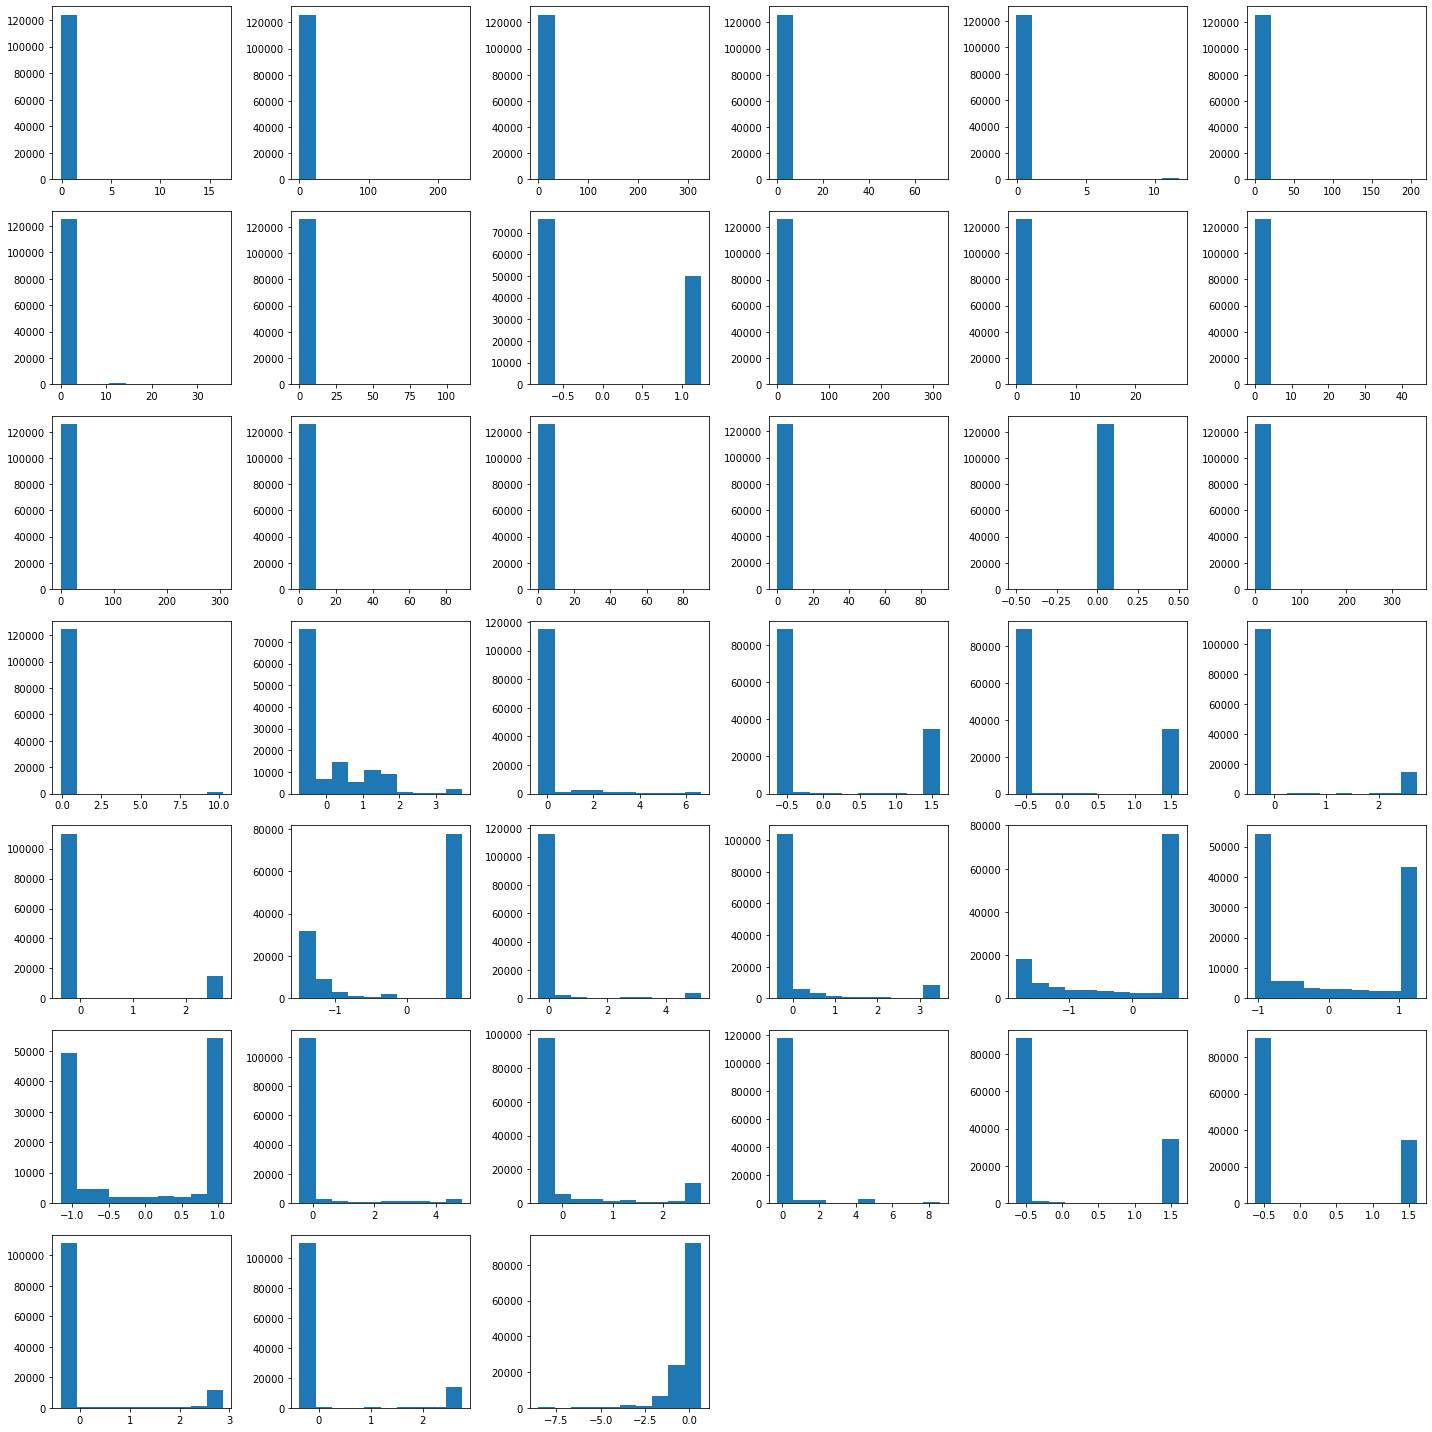

In [12]:

Tot = len(continuous_columns)
Cols = int(np.sqrt(len(continuous_columns)))

# Compute Rows required

Rows = Tot // Cols 

if Tot % Cols != 0:
    Rows += 1

# Create a Position index
Position = range(1,Tot + 1)

fig = plt.figure(figsize=(20,20))
for k in range(len(continuous_columns)):
    ax = fig.add_subplot(Rows,Cols,Position[k])
    counts, bins = np.histogram(df_preprocessed[continuous_columns[k]])
    plt.hist(bins[:-1], bins, weights=counts)

plt.tight_layout()

In [13]:
training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 100778
No. of testing examples: 25195


We counted the number of attacks of each type in our dataset:

In [70]:
df['attack'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [68]:
#df.isnull().sum()

In [16]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

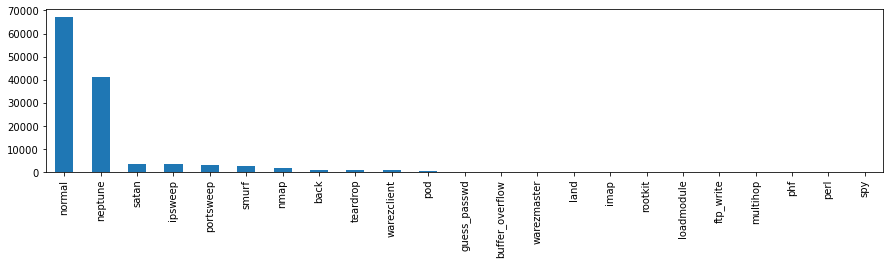

In [17]:
plt.figure(figsize=(15,3))
bar_graph('attack')

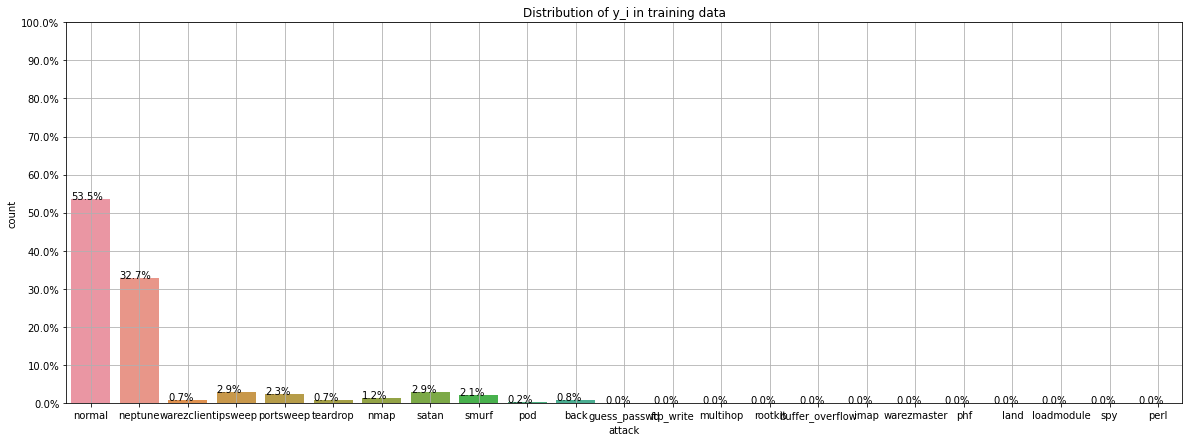

In [75]:
f, ax = plt.subplots(figsize=(20,7))
total = len(df) * 1

ax = sns.countplot(x="attack", data=df)

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
 
ax.yaxis.set_ticks(np.linspace(0, total, 11))

ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

plt.title("Distribution of y_i in training data")
plt.grid()
plt.show()

By analyzing the 4 types of attacks categories, we can conclude that the most relevant information in our dataset for defining if there was an attack or not is: 
“source bytes”
“percentage of packets with errors”
“duration of connection”
“number of file creations”
“number of shell prompts invoked”
“Duration of connection” -Duration
“service requested” 
“number of failed login Attempts”

These are corresponding to the following columns:
Src_bytes,
Serror_rate,
Srv_serror_rate,
Num_file_creations,
Num_shells,
Duration,
Service,
Num_failed _logins, 
Logged_in Login Status,


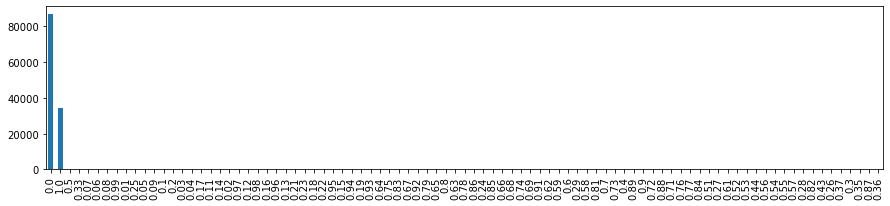

In [23]:
plt.figure(figsize=(15,3))
bar_graph('serror_rate')

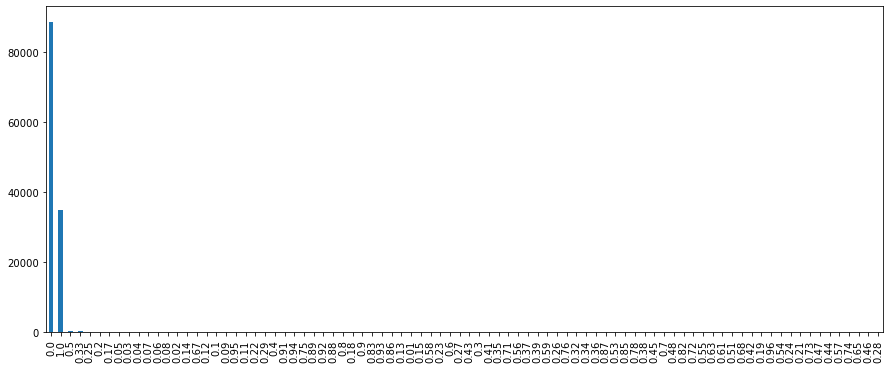

In [31]:
plt.figure(figsize=(15,3))
bar_graph('srv_serror_rate')

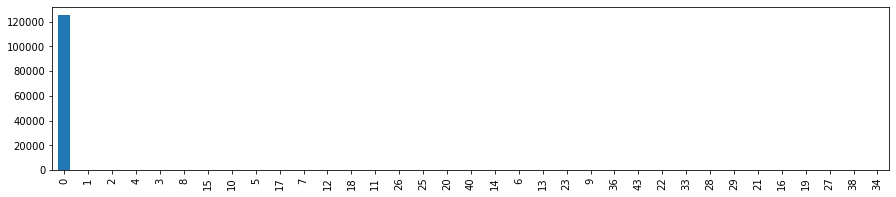

In [25]:
plt.figure(figsize=(15,3))
bar_graph('num_file_creations')

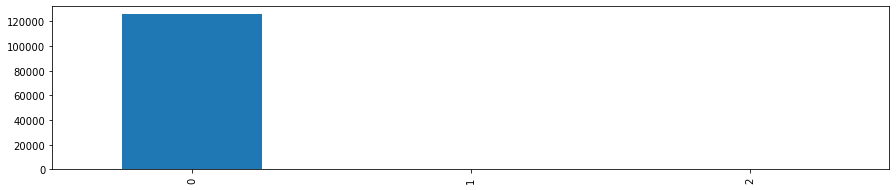

In [32]:
plt.figure(figsize=(15,3))
bar_graph('num_shells')

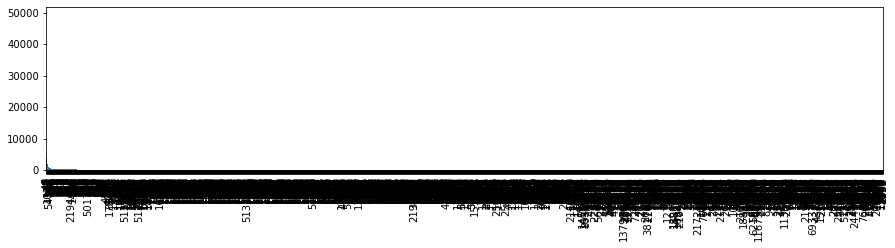

In [22]:
plt.figure(figsize=(15,3))
bar_graph('src_bytes')

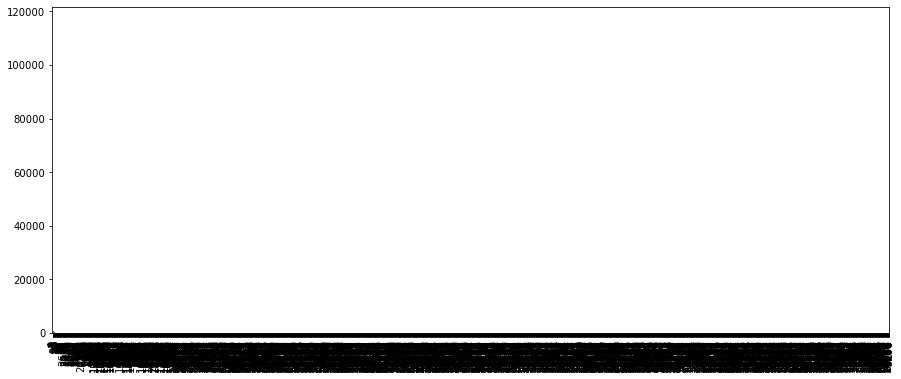

In [33]:
plt.figure(figsize=(15,6))
bar_graph('duration')

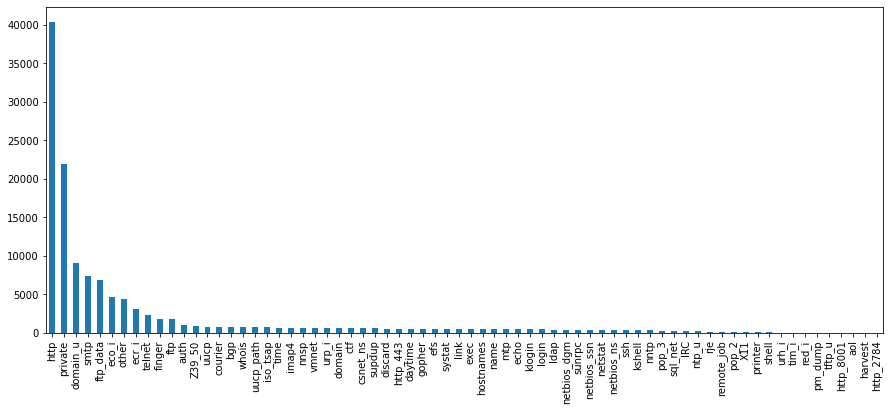

In [34]:
plt.figure(figsize=(15,6))
bar_graph('service')

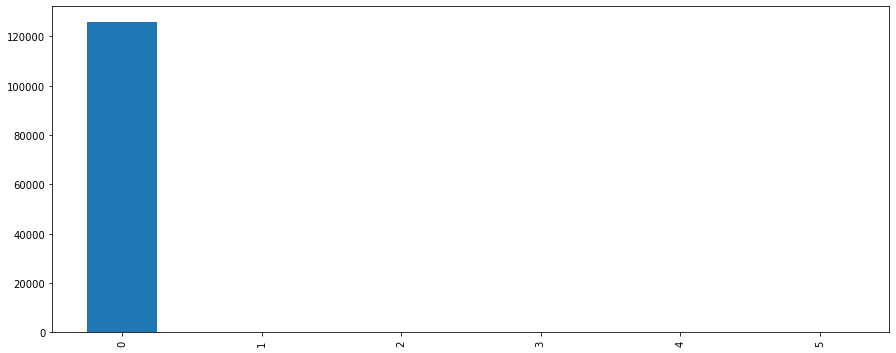

In [36]:
plt.figure(figsize=(15,6))
bar_graph('num_failed_logins')

We are displaying the cells that succesfully logged_in with "1" and the ones that didn't with "0"
We can notice that 50000 managed to log in in comparison with around 7500 which didn't

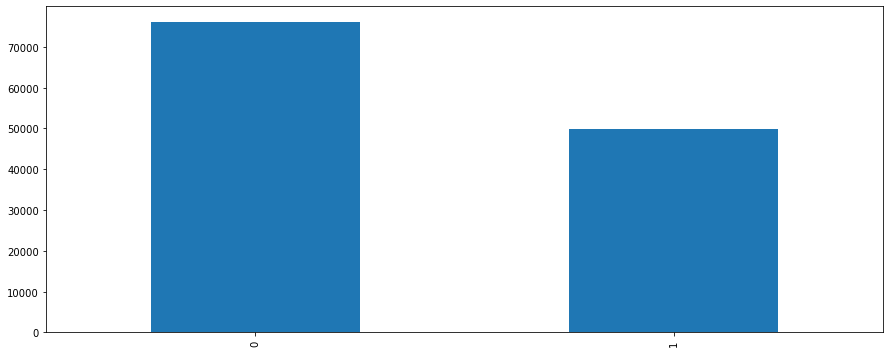

In [38]:
plt.figure(figsize=(15,6))
bar_graph('logged_in')

<h1>Data Correlation </h1>

In the following step we are trying to find the highly correlated variables using heatmap.

C:\temp\ipykernel_18720\1279940228.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')# drop columns with NaN


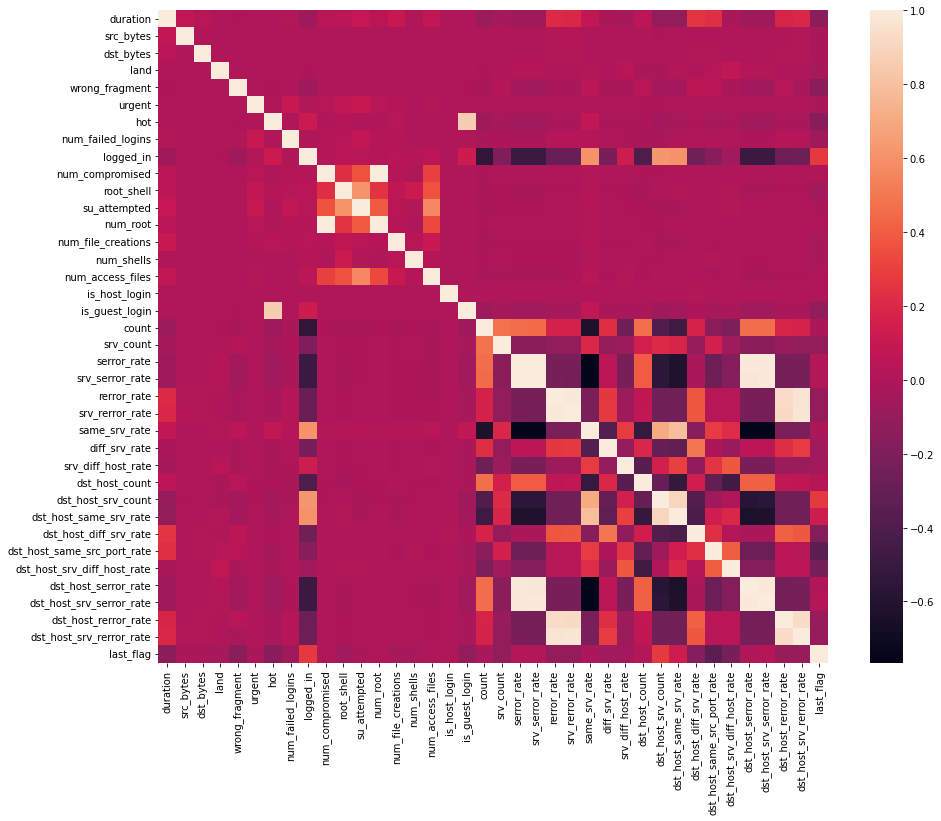

In [41]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize =(15, 12))

sns.heatmap(corr)

plt.show()



In this part, we are classifing our data into 2 categories: normal or attack.
The label 'normal' will have the value 0, while the label 'attack' will be have the value '1' regardless of the attack type.
We are going to add as well a new column 'label' with the information mentioned above.

In [45]:
# creating a function to give label
def labeling(x):
    if x == 'normal':
        return 0
    else:
        return 1
    
#stroing all the attack in the variable label    
label = df['attack'] 

# mapping all the attack to the desired output which is 0 and 1 
class_label = label.map(labeling)

#creating a new column called label in the training data
df['label'] = class_label

In [48]:
print("shape of the train data",df.shape)
df.head(3)

shape of the train data (125973, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune,19,1


After creating and vizualizing the new column we will plot the distribution of class 1 and class 0 for having a better overview of our data

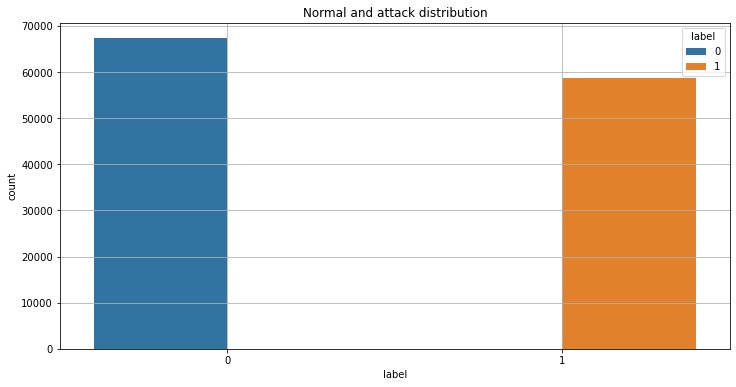

In [50]:
# distribution plot of class 1 and class 0
f, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x = 'label' , data = df , hue = 'label')
plt.title("Normal and attack distribution")
plt.grid()
plt.show()
